In [1]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [2]:
import numpy as np
from typing import Tuple

def squared_distance(x,y):
    return np.sum(np.square(x-y))

def kMeans(k: int, data: np.ndarray, centroids: np.ndarray) -> Tuple[np.ndarray, float]:
    assert k == len(centroids), "The length of centroids should be k."

    new_centroids = np.zeros(centroids.shape)
    distances = np.zeros((len(data), k))

    while True:
        for i in range(len(data)):
            for j in range(k):
                distances[i,j] = squared_distance(data[i],centroids[j])
        
        labels = np.argmin(distances, axis=1)
        
        for i in range(k):
            new_centroids[i] = np.mean(data[labels == i], axis = 0)
        
        if not (new_centroids - centroids).any():
            break
        else:
            centroids = new_centroids.copy()
    inertia = 0
    for i in range(len(data)):
        inertia += squared_distance(data[i],centroids[labels[i]])
    return labels, inertia

Inertia for K-means clustering with all four features is 78.856



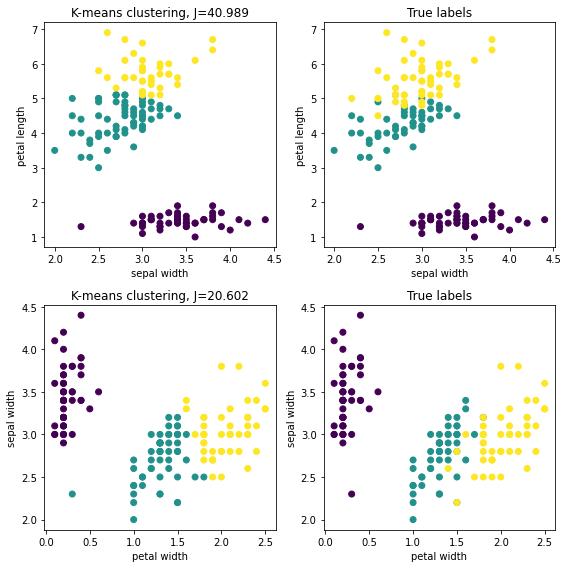

In [3]:
X1 = iris.data[:,1:3]
X2 = iris.data[:,3::-2]
X3 = iris.data[:,:]
y_iris = iris.target

labels_1, inertia_1 = kMeans(3, X1, np.array([[2.5,2],[3,4],[4,6]]))
labels_2, inertia_2 = kMeans(3, X2, np.array([[1,4],[1.5,2],[2,3]]))
labels_3, inertia_3 = kMeans(3, X3, np.array([[5,2.5,2,0.5],[6,3,3,1],[7,4,6,2]]))

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.scatter(X1[:,0], X1[:,1], c = labels_1)
plt.title("K-means clustering, J=%.3f" % inertia_1)
plt.xlabel('sepal width')
plt.ylabel('petal length')

plt.subplot(222)
plt.scatter(X1[:,0], X1[:,1], c = y_iris)
plt.title("True labels")
plt.xlabel('sepal width')
plt.ylabel('petal length')

plt.subplot(223)
plt.scatter(X2[:,0], X2[:,1], c = labels_2)
plt.title("K-means clustering, J=%.3f" % inertia_2)
plt.xlabel('petal width')
plt.ylabel('sepal width')

plt.subplot(224)
plt.scatter(X2[:,0], X2[:,1], c = y_iris)
plt.title("True labels")
plt.xlabel('petal width')
plt.ylabel('sepal width')
plt.tight_layout()

print("Inertia for K-means clustering with all four features is %.3f\n" % inertia_3)